# Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных о заболеваниях сердца. https://www.kaggle.com/ronitf/heart-disease-uci

Анализ подобного набора данных позволяет определить тенденции в данных о сердце для прогнозирования некоторых сердечно-сосудистых заболеваний или выявить какие-либо четкие признаки состояния сердечно-сосудистого здоровья.

Датасет состоит из одного файла heart.csv

Файл содержит следующие колонки:

- age - возраст в годах
- sex - пол (1 - мужской, 0 - женский)
- cp - тип боли в груди
- trestbps - кровяное давление в спокойном состоянии (в mm Hg при поступлении в больницу)
- chol - уровень холестирина в mg/dl
- fbs - уровень сахара > 120 mg/dl (1 - да, 0 - нет)
- restecg - результат ЭКГ (значения 0, 1, 2)
- thal - макс. зафиксированный пульс
- exang - ангина, вызванная управжнениями (1 - да, 0 - нет)
- oldpeak - снижение ST-зубца, вызванного упражнениями, по сравнению со спокойным состоянием
- slope - уклон пикового отрезка ST-зубца
- ca - число крупных судов (0-3), окрашенных по цвету
- thal - 3 = нормально; 6 - исправленный дефект; 7 - исправляемый дефект
- target - целевой признак (0 или 1)

# Импорт библиотек

Импортируем библиотеки с помощью команды import.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета с помощью библиотеки Pandas.

In [5]:
data = pd.read_csv('data/heart.csv', sep=",")

# Проверка на наличие пропусков в данных

In [6]:
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


# Основные характеристики датасета

In [7]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Размер датасета - 303 строки, 14 колонок
data.shape

(303, 14)

In [9]:
# Основные статистические характеристки набора данных
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([1, 0], dtype=int64)

# Корреляционный анализ

## Тепловая карта корреляций всех признаков

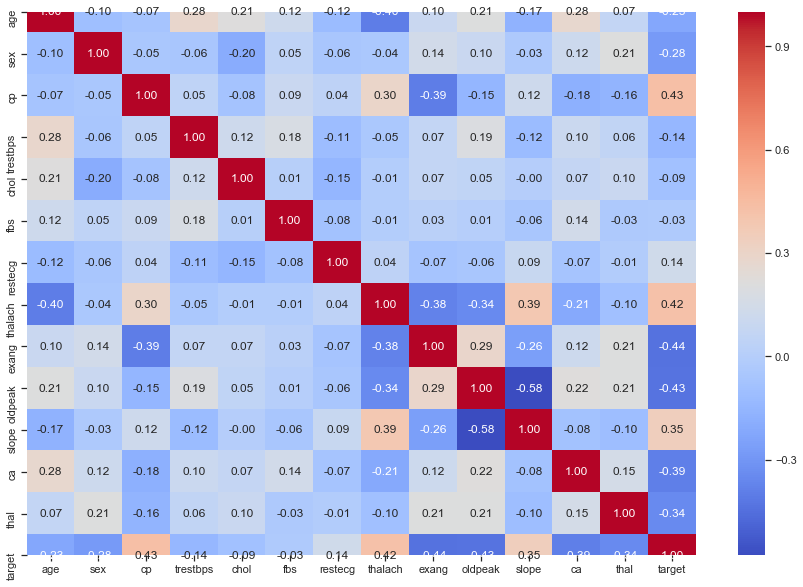

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Таким образом, наибольшая корреляция среди всех признаков наблюдается между:

- Снижением ST-зубца, вызванного упражнениями, по сравнению с состоянием покоя и уклоном пикового отрезка ST-зубца: -0.58 
- Ангиной, вызванной управжнениями и целевым признаком: -0.44
- Типом боли в груди и целевым признаком: 0.43

## Список наибольших по модулю корреляций

In [15]:
data.corr().unstack().abs().sort_values(ascending = False).drop_duplicates()[:10]

target   target     1.000000
slope    oldpeak    0.577537
exang    target     0.436757
target   cp         0.433798
         oldpeak    0.430696
thalach  target     0.421741
         age        0.398522
exang    cp         0.394280
ca       target     0.391724
thalach  slope      0.386784
dtype: float64

Примечание: отсутствие переменной в левом столбце означает, что там стоит та же переменная, что и в строке выше

## Корреляции целевого признака 

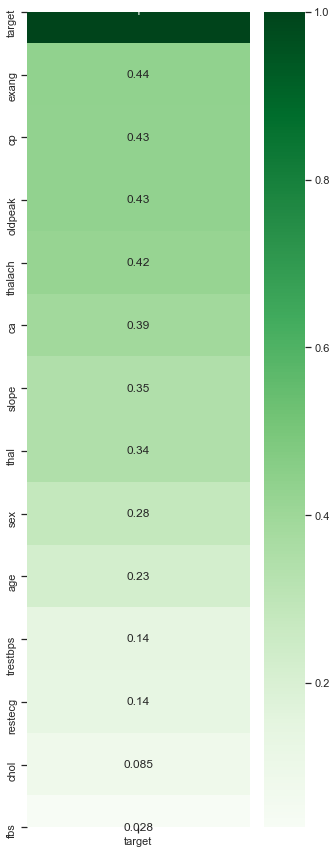

In [16]:
plt.figure(figsize = (5,15))
sns.heatmap(data.corr().abs()[['target']].sort_values(by=['target'],ascending=False),cmap='Greens',annot=True);

Исходя из данного рисунка можно сделать вывод о том, что определения типа сердечно-сосудистого заболения и вообще его наличия следует прежде всего смотреть на:

- наличие ангины, вызванной управжнениями 
- тип боли в груди 
- снижение ST-зубца, вызванного упражнениями, по сравнению со спокойным состоянием 

# Построение гистограммы

Построим гистограмму по столбцу trestbps, что показывает кровяное давление в спокойном состоянии

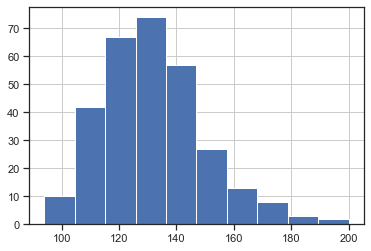

In [17]:
h = data['trestbps'].hist()
fig = h.get_figure()